In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [6]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 1. Karakterkészlet
text = "hello world"
chars = sorted(list(set(text)))
vocab_size = len(chars)

# 2. Tokenizálás
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for ch, i in stoi.items()}

# 3. Egyszerű adat: minden karakter → következő karakter
xs = torch.tensor([stoi[c] for c in text[:-1]])  # input tokenek
ys = torch.tensor([stoi[c] for c in text[1:]])   # target tokenek

print(chars)
print(vocab_size)
print(stoi)
print(itos)
z = ''.join([itos[stoi[c]] for c in text[:-1]])
print( z ) 
print(xs)
print(ys)

[' ', 'd', 'e', 'h', 'l', 'o', 'r', 'w']
8
{' ': 0, 'd': 1, 'e': 2, 'h': 3, 'l': 4, 'o': 5, 'r': 6, 'w': 7}
{0: ' ', 1: 'd', 2: 'e', 3: 'h', 4: 'l', 5: 'o', 6: 'r', 7: 'w'}
hello worl
tensor([3, 2, 4, 4, 5, 0, 7, 5, 6, 4])
tensor([2, 4, 4, 5, 0, 7, 5, 6, 4, 1])


Step   1 | Loss: 2.6164
Step  11 | Loss: 2.5290
Step  21 | Loss: 2.4445
Step  31 | Loss: 2.3627
Step  41 | Loss: 2.2835
Step  51 | Loss: 2.2069
Step  61 | Loss: 2.1329
Step  71 | Loss: 2.0613
Step  81 | Loss: 1.9921
Step  91 | Loss: 1.9254
Step 100 | Loss: 1.8673


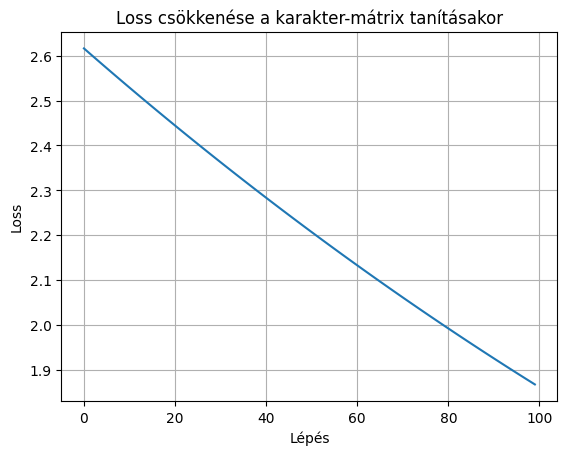

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 1. Karakterkészlet
text = "hello world"
chars = sorted(list(set(text)))
vocab_size = len(chars)

# 2. Tokenizálás
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for ch, i in stoi.items()}

# 3. Egyszerű adat: minden karakter → következő karakter
xs = torch.tensor([stoi[c] for c in text[:-1]])  # input tokenek
ys = torch.tensor([stoi[c] for c in text[1:]])   # target tokenek

# 4. Súlymátrix inicializálása (bigram logit predikció)
W = torch.randn((vocab_size, vocab_size), requires_grad=True)

# 5. Tanítási paraméterek
lr = 0.1
loss_history = []

# 6. Tréning ciklus
for step in range(100):
    # Előrefelé számolás
    logits = W[xs]                 # (T, vocab_size)
    loss = F.cross_entropy(logits, ys)

    # Loss mentése
    loss_history.append(loss.item())

    # Visszaterjesztés
    loss.backward()

    # Súlyfrissítés
    with torch.no_grad():
        W -= lr * W.grad
        W.grad.zero_()

    # Debug print
    if step % 10 == 0 or step == 99:
        print(f"Step {step+1:3d} | Loss: {loss.item():.4f}")

# 7. Loss görbe kirajzolása
plt.plot(loss_history)
plt.xlabel("Lépés")
plt.ylabel("Loss")
plt.title("Loss csökkenése a karakter-mátrix tanításakor")
plt.grid(True)
plt.show()
